# ONLINE SALES DATA ANALYSIS

# Objective:

**The objective of this data analysis project is to gain insights into the Online Sales data of a fictional company. We will analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.**


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

### INSIGHT

Libraries Import: The code imports essential libraries for data manipulation and visualization, including pandas (pd), numpy (np), and matplotlib (plt). Additionally, seaborn (sns) and mysql are imported for enhanced data visualization and for connection to database respectively.

# Database Connectivity

In [3]:
#connect to mysql
connection = mysql.connector.connect(
    host='localhost',
    user='root', #your username
    password='root', #your password
    database='OnlineSales' #the database from where you to want to fetch the data
)

In [4]:
#create a connection cursor object
cursor = connection.cursor()

In [5]:
#query data from the product table

cursor.execute('SELECT * FROM product')

#storing the data into pandas dataframe

pdt_df= pd.DataFrame(cursor.fetchall(), columns= [col[0] for col in cursor.description])

In [6]:
#query data from the customer table

cursor.execute('SELECT * FROM customer')

#storing the data into pandas dataframe

cst_df= pd.DataFrame(cursor.fetchall(), columns= [col[0] for col in cursor.description])

In [71]:
#query data from the order_details table

cursor.execute('SELECT * FROM order_details')

#storing the data into pandas dataframe

od_df= pd.DataFrame(cursor.fetchall(), columns= [col[0] for col in cursor.description])

In [7]:
#close the connection and cursor
cursor.close()
connection.close()

In [73]:
#printing first 5 records from product table
pdt_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [74]:
#printing first 5 records from customer table
cst_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Amit,Mumbai,amit@gmail.com,9876543210,Andheri East,400053
1,C1002,Raj,Delhi,raj@gmail.com,9871234567,Connaught Place,110001
2,C1003,Vikram,Chennai,vikram@gmail.com,9876547890,T. Nagar,600017
3,C1004,Priya,Bangalore,priya@gmail.com,9875671234,Koramangala,560034
4,C1005,Aarav,Hyderabad,aarav@gmail.com,9123456789,Banjara Hills,500034


In [75]:
#printing first 5 records from order_details table
od_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered


### INSIGHT

Using head() function,we have displayed the first 5 rows of the product, customer and order_details dataset. This provides a quick preview of the data structure, column names, and initial values.

In [76]:
#printing last 5 records from product table
pdt_df.tail()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
56,P158,Electric Toothbrush,Appliance,Electronics,4000.0,3000.0,18
57,P159,Car Vacuum,Appliance,Electronics,5000.0,4000.0,20
58,P160,Portable Speaker,Appliance,Electronics,3500.0,3000.0,22
59,P161,Smart Scale,Appliance,Electronics,3000.0,2500.0,20
60,P162,Streaming Device,Electronics,Accessories,5000.0,4000.0,18


In [77]:
#printing last 5 records from product table
cst_df.tail()

,customer_id,name,city,email,phone_no,address,pin_code
57,C1063,Vikas,Mumbai,vikas@gmail.com,9890123461,Dadar,400028
58,C1064,Ajay,Bangalore,ajay@gmail.com,9012345683,Marathahalli,560037
59,C1065,Ritika,Kolkata,ritika@gmail.com,9123456785,Dum Dum,700028
60,C1066,Punit,Jaipur,punit@gmail.com,9234567896,C Scheme,302001
61,C1067,Suman,Hyderabad,suman@gmail.com,9345678907,Kukatpally,500072


In [78]:
#printing last 5 records from product table
od_df.tail()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
71,91,C1063,P159,2.0,8000.0,Online,2024-03-17,Delivered
72,92,C1064,P160,1.0,3000.0,COD,2024-03-18,Cancelled
73,93,C1065,P161,1.0,2500.0,Online,2024-03-19,Delivered
74,94,C1066,P162,1.0,4000.0,COD,2024-03-20,Delivered
75,95,C1067,P154,2.0,4000.0,Online,2024-03-21,Shipped


### INSIGHT

Using tail() function,we have displayed the last 5 rows of the product, customer and order_details dataset. This provides a quick preview of the data structure, column names, and initial values.

In [79]:
pdt_df.shape

(61, 7)

### INSIGHT
The product dataset comprises 61 rows and 7 columns.

In [81]:
cst_df.shape

(62, 7)

### INSIGHT
The customer dataset comprises 62 rows and 7 columns.

In [82]:
od_df.shape

(76, 8)

### INSIGHT
The order_details dataset comprises 76 rows and 8 columns.

In [17]:
pdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


###  INSIGHT
No Variable column has null/missing values.

In [18]:
cst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


###  INSIGHT
No Variable column has null/missing values.

In [19]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


###  INSIGHT
No Variable column has null/missing values.

# Data Cleaning

In [23]:
pdt_df.nunique()

product_id        61
product_name      43
category           4
sub_category      22
original_price    25
selling_price     26
stock             14
dtype: int64

###  INSIGHT
-product_id: There are 61 unique ids in the dataset. This implies that each row corresponds to a different id, and there are no duplicate ids.
-product_name, category, sub_category, original_price, selling_price, stock: The counts of unique values vary, indicating that there are repeated values in these columns

In [8]:
cst_df.nunique()

customer_id    62
name           62
city            9
email          62
phone_no       62
address        62
pin_code       60
dtype: int64

### INSIGHT
customer_id: There are 62 unique ids in the dataset. This implies that each row corresponds to a different id, and there are no duplicate ids.
name, city, email, phone_no, address, pin_code: The counts of unique values vary, indicating that there are repeated values in these columns.

In [25]:
od_df.nunique()

order_id        76
customer_id     59
product_id      58
quantity         3
total_price     33
payment_mode     2
order_date      75
order_status     5
dtype: int64

### INSIGHT
product_id: There are 76 unique ids in the dataset. This implies that each row corresponds to a different id, and there are no duplicate ids.
customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status: The counts of unique values vary, indicating that there are repeated values in these columns.

In [26]:
pdt_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

### INSIGHT
There are no missing values (null values) in any of the columns.
Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.

In [27]:
cst_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

### INSIGHT
There are no missing values (null values) in any of the columns.
Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.

In [28]:
od_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

### INSIGHT
There are no missing values (null values) in any of the columns.
Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.

In [36]:
#checking for duplicate values
duplicate_rows=pdt_df[pdt_df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


In [37]:
#checking for duplicate values
duplicate_rows=cst_df[cst_df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code]
Index: []


In [38]:
#checking for duplicate values
duplicate_rows=od_df[od_df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


# Visualization:


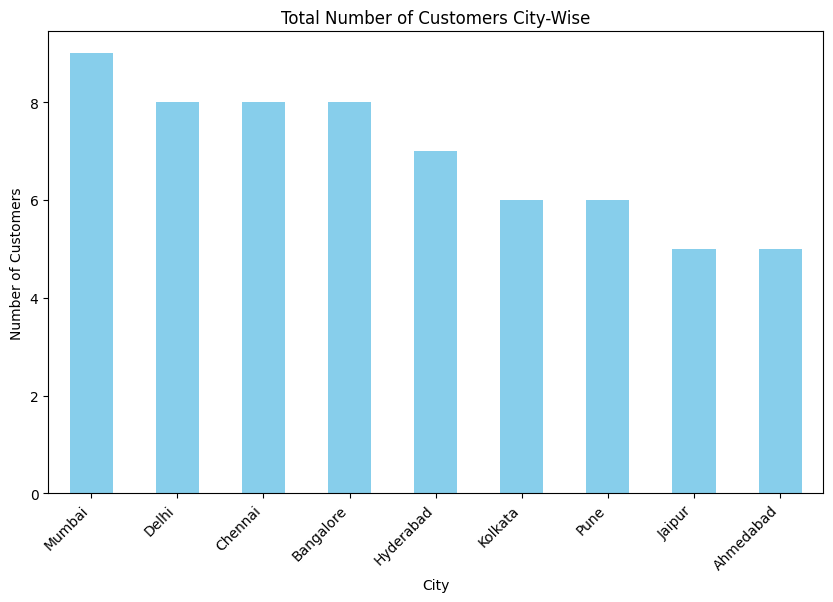

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
cst_df['city'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers City-Wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  
plt.show()

## INSIGHT

- It's a bar chart, where each bar represents a city, and the height of the bar indicates the number of customers in that city.
- By looking at the chart, you can quickly see which cities have more customers. The taller bars indicate more customers in those cities, while shorter bars represent fewer customers.

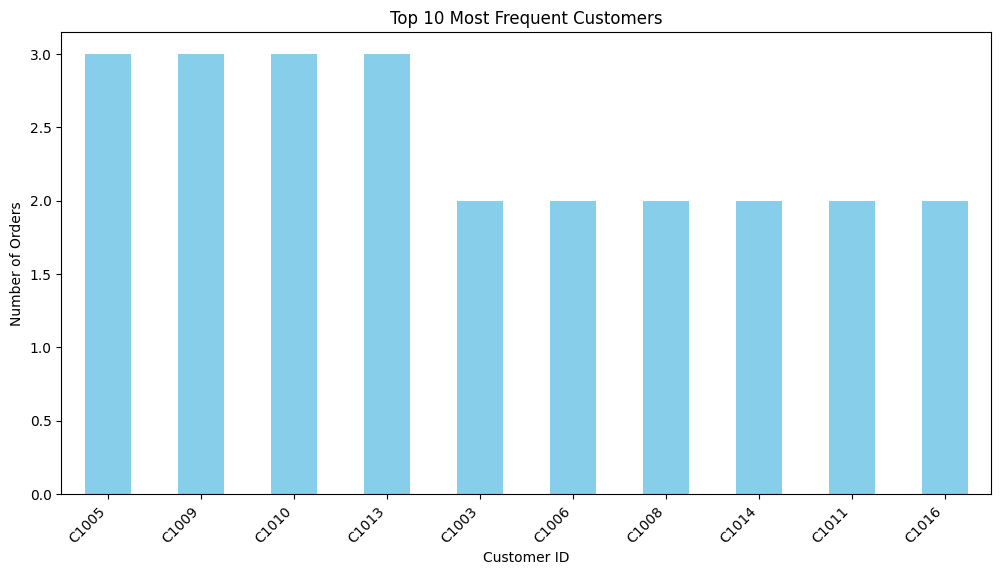

In [42]:
# Merge customer_data and orders on customer_id
df_combined = pd.merge(cst_df, od_df, on='customer_id')

# Count the number of orders for each customer
order_counts = df_combined['customer_id'].value_counts()

# Select the top 10 customers
top_10_customers = order_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right') 
plt.show()

## INSIGHT

- By looking at the chart, you can easily identify the top 10 customers who have placed the most orders.

- Taller bars represent customers with a higher number of orders, providing a quick overview of the most frequent customers.

- This kind of analysis is valuable for identifying and recognizing active customers.

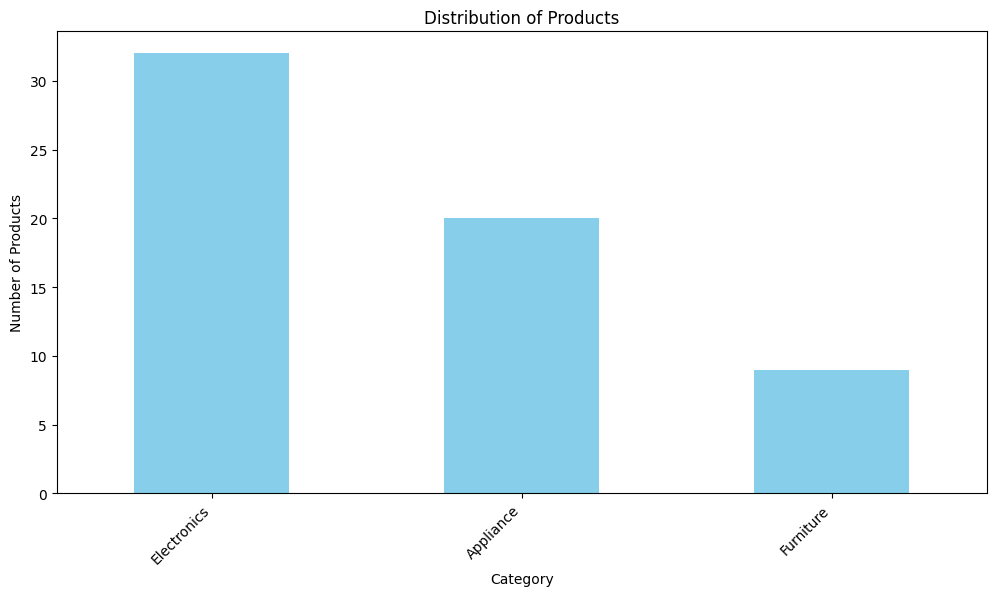

In [43]:

plt.figure(figsize=(12, 6))
pdt_df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Products')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  
plt.show()

## INSIGHT

- By looking at the chart, you can quickly see which product categories have more products. The taller bars indicate more products in those categories, while shorter bars represent fewer products.

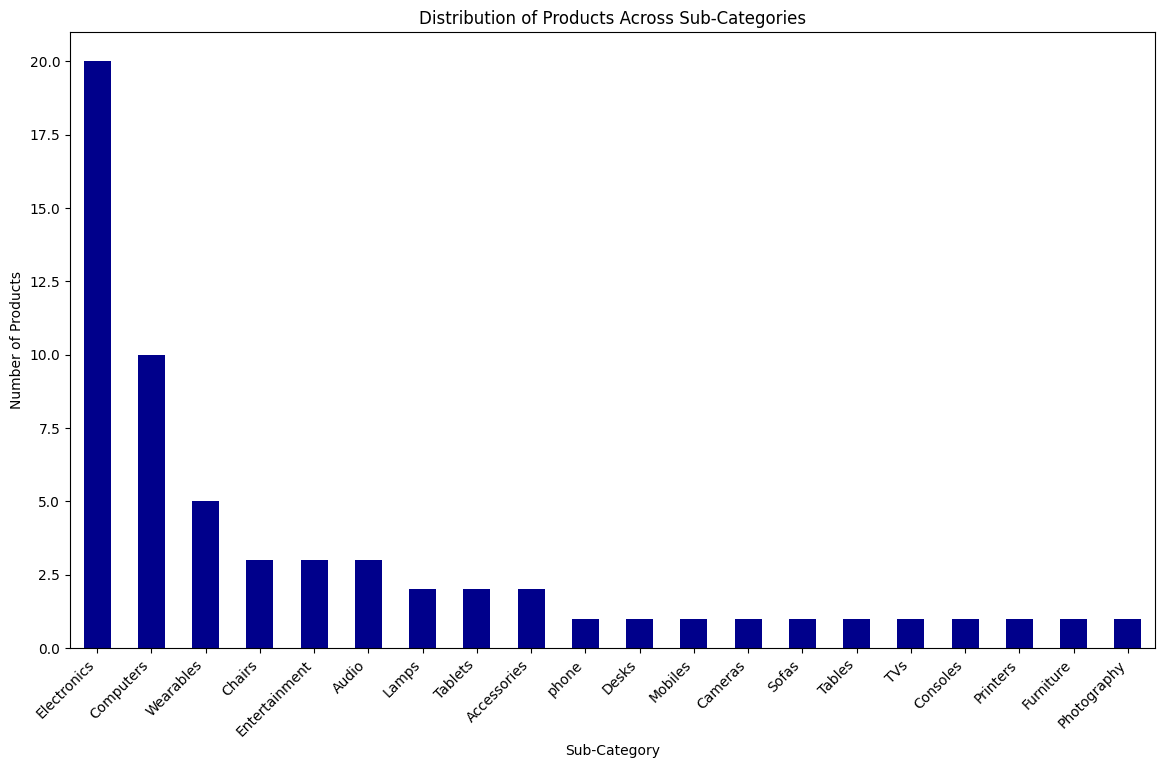

In [44]:
# Plotting
plt.figure(figsize=(14, 8))
pdt_df['sub_category'].value_counts().plot(kind='bar', color='darkblue')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INSIGHT

-  By looking at the chart, you can quickly see which sub-categories have more products. The taller bars indicate more products in those sub-categories, while shorter bars represent fewer products.

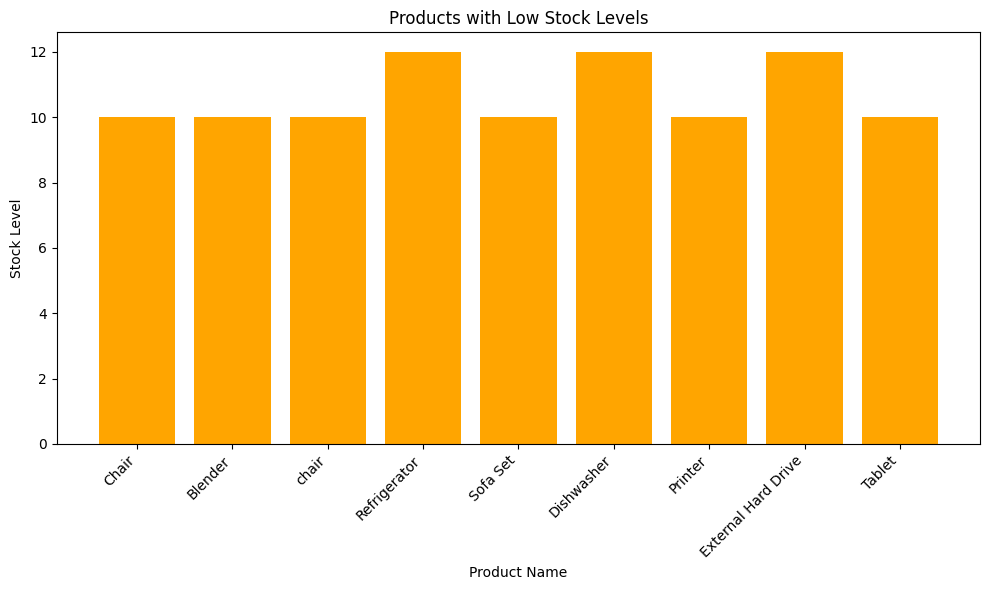

In [45]:
low_stock = 15
low_stock_prod = pdt_df[pdt_df['stock'] < low_stock]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(low_stock_prod['product_name'], low_stock_prod['stock'], color='orange')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()

# Show the bar chart
plt.show()

## INSIGHT

- By looking at the chart, you can quickly identify and visualize products that are running low in stock. The shorter bars indicate products with low stock levels, helping in inventory management decisions.

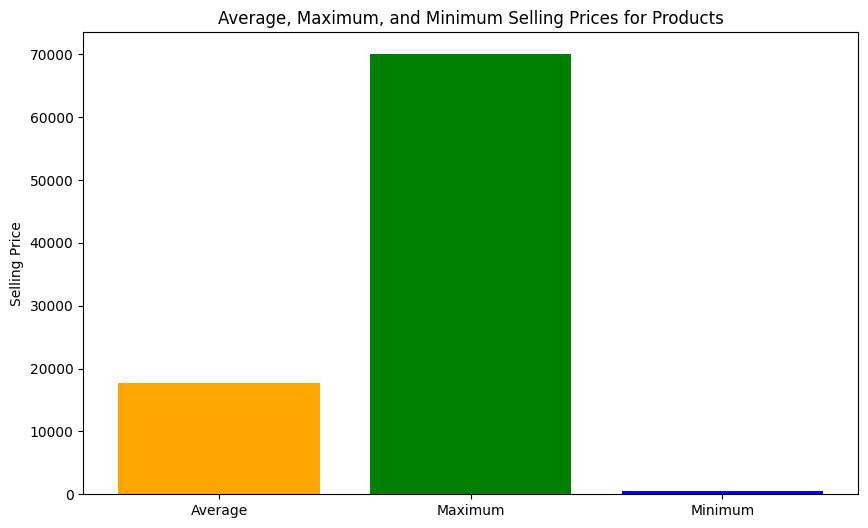

In [46]:
# Calculate average, maximum, and minimum selling prices
average_price = pdt_df['selling_price'].mean()
maximum_price = pdt_df['selling_price'].max()
minimum_price = pdt_df['selling_price'].min()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_price, maximum_price, minimum_price], color=['orange', 'green', 'blue'])
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.xlabel('')
plt.ylabel('Selling Price')
plt.show()

## INSIGHT
- By looking at the chart, you can easily compare the average, maximum, and minimum selling prices.
- The bar heights represent the respective values, providing a quick overview of the price distribution.

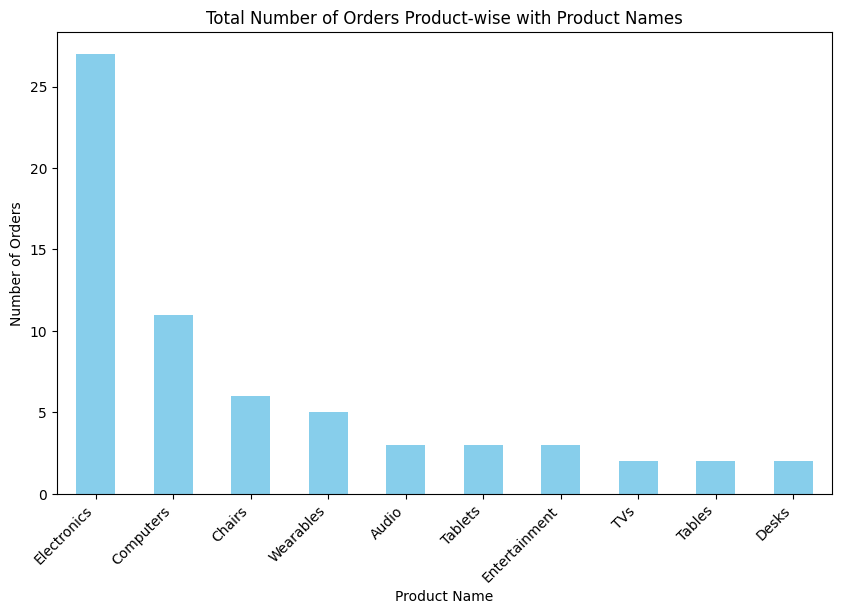

In [47]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Count the number of orders for each product
order_counts = df_combined['sub_category'].value_counts()

# Select the top 10 products
top_10_products = order_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INSIGHT

- The chart provides a quick overview of the most popular products based on the number of orders.
- Taller bars represent products with a higher number of orders, allowing for easy identification of popular items.

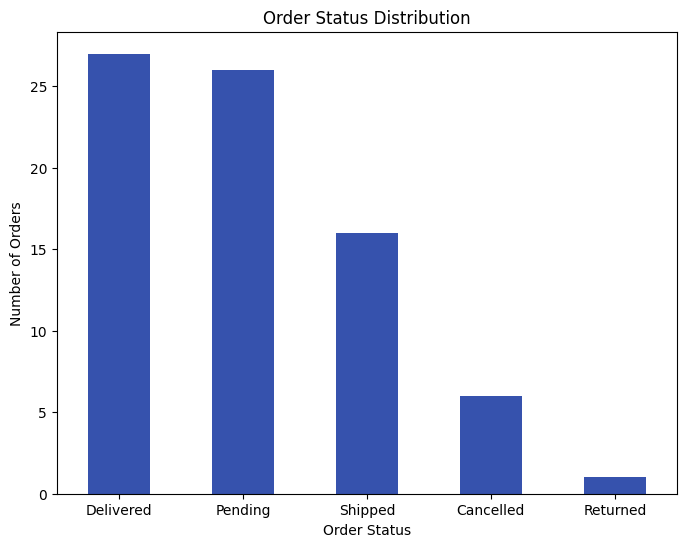

In [48]:
# Count the number of orders for each status
order_status_counts = od_df['order_status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='#3652AD')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Do not rotate x-axis labels for order status
plt.show()

## INSIGHT

- The chart provides a visual breakdown of how many orders fall into each status category.
- It helps in understanding the distribution of orders across different states such as shipped, delivered, pending, etc.

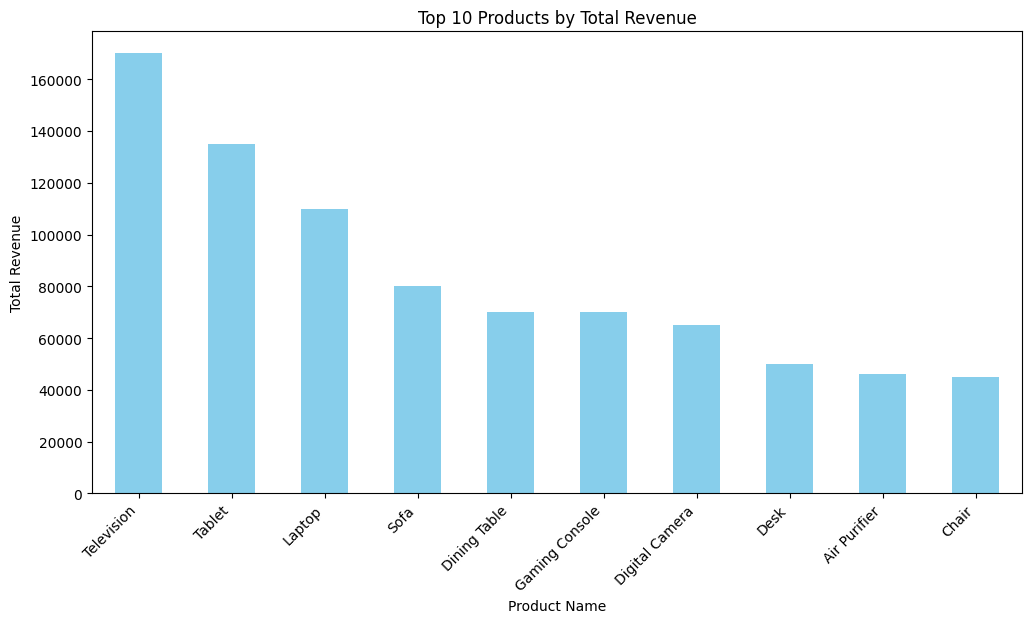

In [50]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total revenue for each product without adding an extra column
product_total_revenue = df_combined.groupby('product_name')['selling_price'].sum()

# Select the top 10 products based on total revenue
top_10_revenue_products = product_total_revenue.nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_revenue_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## INSIGHT

- **Selecting Top 10 Revenue Products:** The top 10 products with the highest total revenue are selected using nlargest(10).
- The chart provides a visual representation of the top 10 products that have generated the highest total revenue.
- Longer bars represent products with higher total revenue, making it easy to identify the most profitable items.

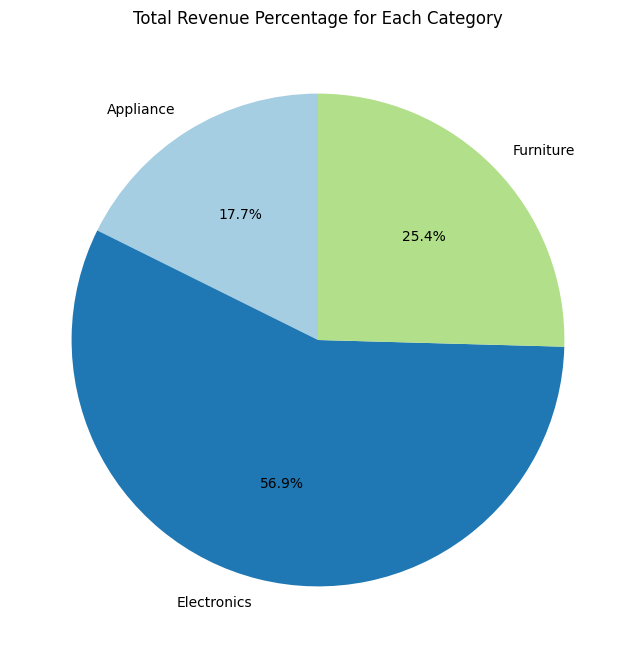

In [51]:
# Merge orders and products on product_id
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate total revenue for each category
category_total_revenue = df_combined.groupby('category')['selling_price'].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_total_revenue, labels=category_total_revenue.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Revenue Percentage for Each Category')
plt.show()

## INSIGHT

- The pie chart visually represents the proportion of total revenue contributed by each category.
- Larger slices indicate categories with a higher share of the total revenue, providing an overview of revenue distribution among different product categories.

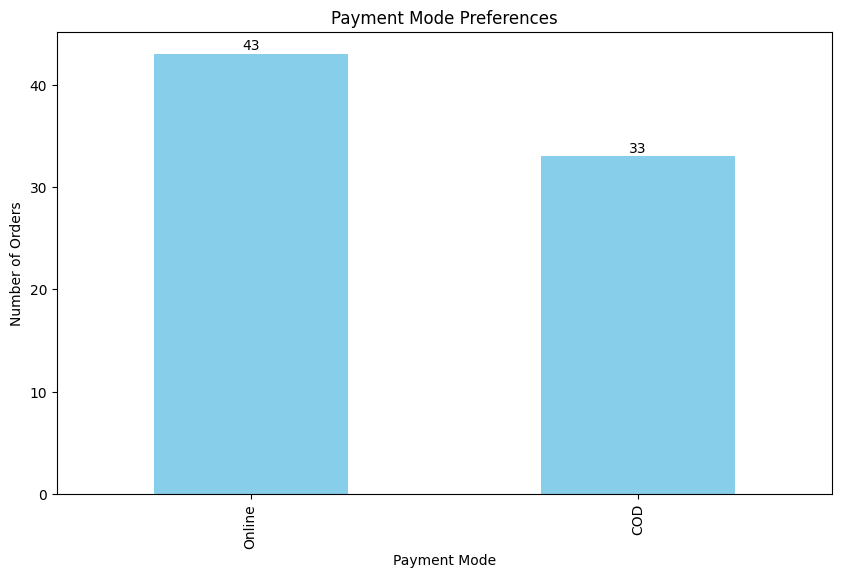

In [56]:
# Calculate the count of each payment mode
payment_mode_counts = od_df['payment_mode'].value_counts()

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')

# Label each bar with its count
for i, count in enumerate(payment_mode_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Payment Mode Preferences')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')

plt.show()

## INSIGHT

- The bar chart visually communicates the most preferred payment modes based on order counts.
- It allows easy comparison between different payment modes, helping to identify which mode is most commonly used.

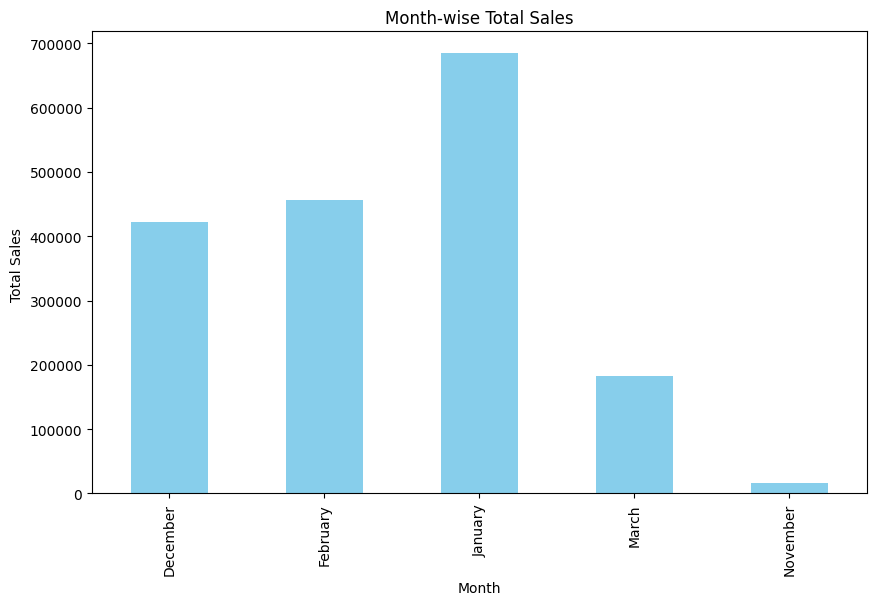

In [57]:
# Merge order and product tables
df_combined = pd.merge(od_df, pdt_df, on='product_id')

# Calculate month-wise total product sales
monthwise_product_sales = df_combined.groupby('month')['quantity'].sum() * df_combined.groupby('month')['selling_price'].mean()

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
monthwise_product_sales.plot(kind='bar', color='skyblue')

# Label each bar with its total sales
for i, sales in enumerate(monthwise_product_sales):
    plt.text(i, sales + 10, '', ha='center', va='bottom')

plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ')

plt.show()

## INSIGHT

- Calculating Month-wise Sales: The code calculates the month-wise total product sales by grouping the combined DataFrame by the 'month' column. The total sales for each month are calculated as the sum of the product of 'quantity' and 'selling_price' for each order.
- The bar chart visually communicates the variation in total product sales across different months.

# CONCLUSION

#### The Online Sales data analysis provides comprehensive insights, including product performance, customer behavior, payment preferences, and trends. Key highlights include identifying top revenue-generating products, understanding customer order patterns, and recognizing popular payment modes. This analysis equips businesses to make data-driven decisions for strategic growth and customer engagement.